<a href="https://colab.research.google.com/github/Onyii397/Data-Science-Interview-Preperation-Resources/blob/main/Onyinyechi_Ayogu's_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSITY RANKING PREDICTION USING RANDOM FOREST**


**INTRODUCTION**


Each year, there is an updated list of the world's university ranking. University ranking seeks to answer the question of "which university is the best?" However, ranking universities is a difficult, political and controversial exercise. With several national and international university ranking systems, each of which has peculiar biases, there usually exists disagreement with the ranking results. There are several factors that contribute to the overall universities ranks.

In this analysis, I aim to build a machine learning model to predict the Universities ranks.

**THE DATA**

The data sets in use are the Times Higher Education ranking data available on kaggle [https://www.kaggle.com/datasets/mylesoneill/world-university-rankings?select=timesData.csv] also available at (https://www.kaggle.com/datasets/r1chardson/the-world-university-rankings-2011-2023) . The Times Higher Education World University Rankings are about the best university performance judge that considers teaching, research, international outlook amongs other factors and characteristics of the universities.

**METHODS and RESULT**

The data in consideration is a lebeled data with the world rank as the response to the various features of the data hence we shall explore the **decision tree/random forest** method. The choice of this maching learning method is based on the structure of my data.

I grouped the universities into five(5) rank-classes hence the prediction is to classify the test data into the classes they belonged initially.

We shall start with preliminary analysis then to exploratpry data analysis then to decision tree and random forest. we shall also carry out a k-fold cross validation on the trees.

The results of each process will be explained at the end of the each output.

**Pre- Analysis**

In this section, we shall import libraries, datasets and also perform data cleaning.

In [ ]:
# Loading the required python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.express as px
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:

# Import the first ranking dataset that covered 2011 to 2016
Unidetails = pd.read_csv('2011-2016.csv')
Unidetails.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42:58:00,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45:55:00,2011


In [ ]:

# Import the other ranking datasets
DT21 = pd.read_csv('2021_rankings.csv')
DT22 = pd.read_csv('2022_rankings.csv')
DT23 = pd.read_csv('2023_rankings.csv')

In [ ]:
# we drop some features that may not be necessary for the analysis
DT21 = DT21.drop(['rank_order','scores_overall_rank','scores_teaching_rank','scores_research_rank','scores_citations_rank','scores_industry_income_rank','scores_international_outlook_rank','subjects_offered','stats_female_male_ratio','aliases','closed','unaccredited'],axis=1)
DT22 = DT22.drop(['rank_order','scores_overall_rank','scores_teaching_rank','scores_research_rank','scores_citations_rank','scores_industry_income_rank','scores_international_outlook_rank','subjects_offered','stats_female_male_ratio','aliases','closed','unaccredited'],axis=1)
DT23 = DT23.drop(['rank_order','scores_overall_rank','scores_teaching_rank','scores_research_rank','scores_citations_rank','scores_industry_income_rank','scores_international_outlook_rank','subjects_offered','stats_female_male_ratio','aliases','closed','unaccredited'],axis=1)

# remove ponctuations, and other signs from the entries
DT21 = DT21.replace(['-','=',','],'', regex=True)
DT22 = DT22.replace([',','=','-'],'', regex=True)
DT23 = DT23.replace([',','=','-'],'', regex=True)

#we select the first 150 rows
SEL_21 = DT21.iloc[0:150]
SEL_22 = DT22.iloc[0:150]
SEL_23 = DT23.iloc[0:150]

In [ ]:
# we merge the three data sets for ranking 2021, 2022 and 2023 to become one dataframe
Stat_3yrs = pd.concat([SEL_21,SEL_22,SEL_23])

In [ ]:
# we rename the columns of the second dataset of rankings from 2021 to 2023 to be the same with that of the first dataset of rankings from 2011 to 2016
Stat_3yrs = Stat_3yrs.rename(columns={ 'rank' : 'world_rank', 'name' : 'university_name', 'scores_overall' : 'total_score',
       'scores_teaching' : 'teaching', 'scores_research' : 'research', 'scores_citations' : 'citations',
       'scores_industry_income' : 'income',
       'scores_international_outlook': 'international',
       'location' : 'country', 'stats_number_students' : 'num_students', 'stats_student_staff_ratio' : 'student_staff_ratio',
       'stats_pc_intl_students': 'international_students'})

# we rearrange the columns of the second to have the same position with the first dataset
Stat_3yrs = Stat_3yrs.loc[:, ['world_rank', 'university_name','country', 'teaching', 'international','research',
       'citations', 'income','total_score',
       'num_students', 'student_staff_ratio','international_students']]

# to remove the remaining symbols in the dataset
Stat_3yrs = Stat_3yrs.replace([',','%'],'', regex=True)

In [ ]:
# we drop missing values, the column female_male_ratio
Unidetails = Unidetails.dropna()
Unidetails = Unidetails.drop('female_male_ratio', axis = 1)
np.sum(Unidetails.isnull())

world_rank                0
university_name           0
country                   0
teaching                  0
international             0
research                  0
citations                 0
income                    0
total_score               0
num_students              0
student_staff_ratio       0
international_students    0
year                      0
dtype: int64

**VISUALIZATIONS**

**Exploratory Data Analysis**

Here we visualize some features of our data set to understand the contributions of the remaining features of our dataset.

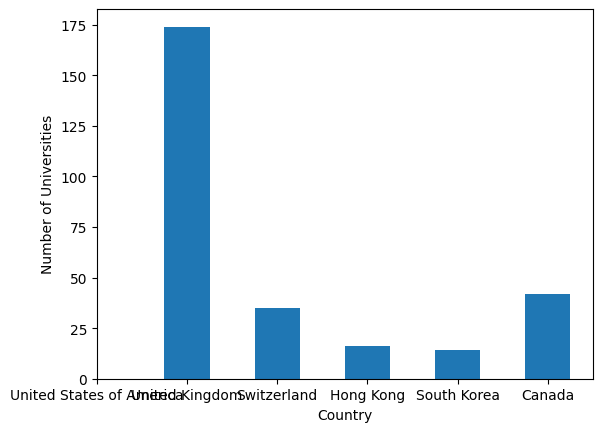

In [ ]:
# to visualize the countries and their number of universities
import matplotlib.pyplot as plt
binbreaks = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]
plt.hist(Unidetails[['country']], bins=binbreaks)
plt.xlabel('Country')
plt.ylabel('Number of Universities')
plt.show()

The bar plot shows that the universities in the dataset are more of united kingdom and united states origin

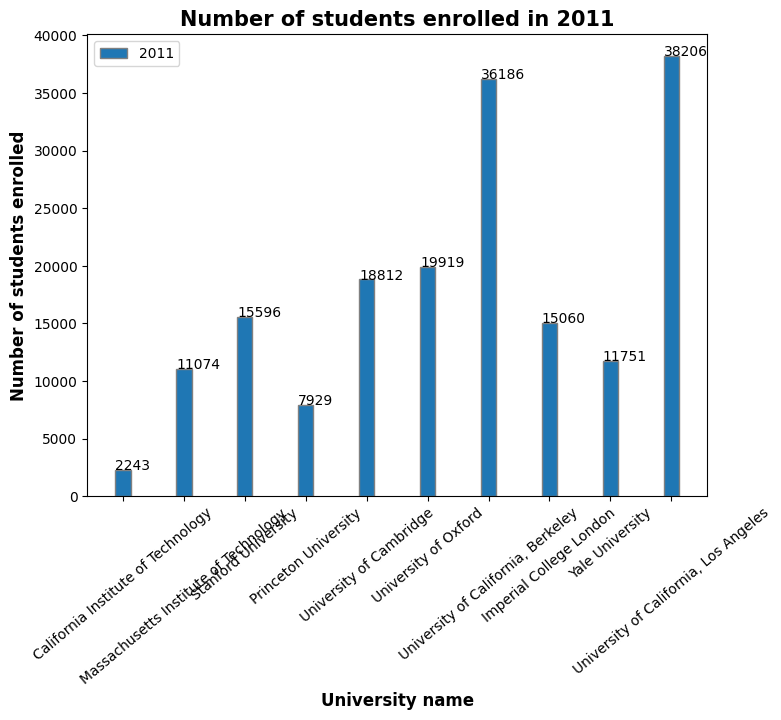

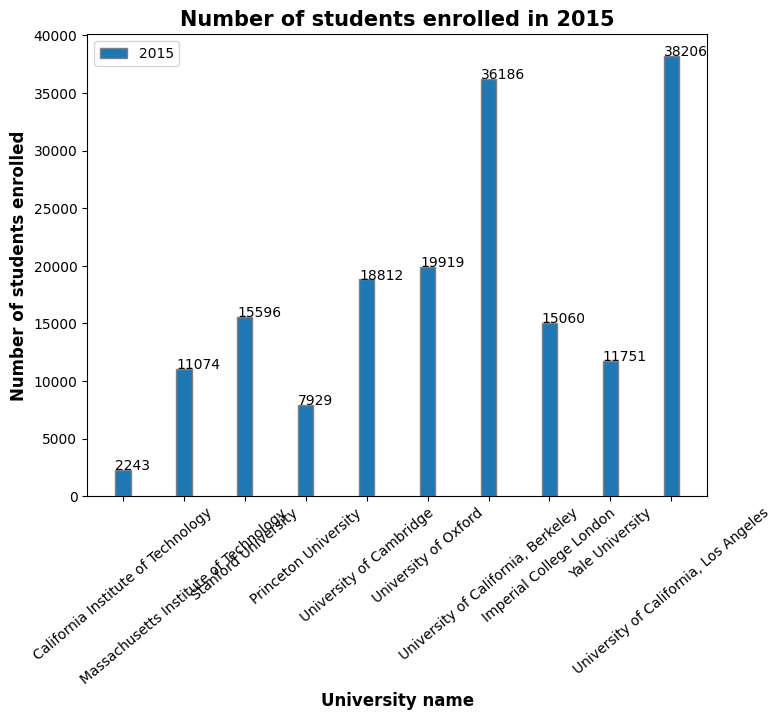

In [ ]:
# to visualize the number of students in the universities for each year

def students_count(df, year):
    """ A function to get sub-dataframe of students count of the of Universities.

    args:
    df = input dataframe
    year = year of the analysis

    returns:
    sub-dataframe
    """
    students_year = df[['university_name','num_students']][:10]
    students_year["year"] = year
    students_year['num_students'] = students_year['num_students'].str.replace(',','').astype("int64")
    return students_year

students_2011 = students_count(Unidetails, 2011)
students_2012 = students_count(Unidetails, 2012)
students_2013 = students_count(Unidetails, 2013)
students_2014 = students_count(Unidetails, 2014)
students_2015 = students_count(Unidetails, 2015)


# plot the figure
def students_plot(df, year):
    """ A function to plot the students count by top10 universities.

    args:
    df = input dataframe
    year = year of the analysis

    returns:
    matplotlib pyplot chart
    """
    fig, ax = plt.subplots(figsize=(8,6))
    ax.bar(x=df['university_name'], height=df['num_students'], width=0.25, edgecolor='grey', label=year)
    ax.set_xlabel('University name', fontweight ='bold', fontsize = 12)
    ax.set_ylabel('Number of students enrolled', fontweight ='bold', fontsize = 12)
    ax.set_xticks(ticks=df['university_name'])
    ax.set_xticklabels(labels=df['university_name'], rotation=40)
    for p in ax.patches:
        ax.annotate(f"{p.get_height()}", (p.get_x(),p.get_height()+10))
    ax.legend()
    ax.set_title(f"Number of students enrolled in {year}",fontweight ='bold', fontsize = 15)
    plt.show()

students_plot(students_2011, 2011)
#students_plot(students_2012, 2012)
#students_plot(students_2013, 2013)
#students_plot(students_2014, 2014)
students_plot(students_2015, 2015)

The dataset in consideration contains the same number of students for almost all the universities for the periods in consideration

In [ ]:
import warnings

warnings.filterwarnings("ignore")

def ranking_by_year(df, year):
    """A function to get sub-dataframe of rankings of Universities.

    Args:
    df: input dataframe
    year: year of the analysis

    Returns:
    sub-dataframe
    """

    rank_2011 = pd.DataFrame()
    rank_2012 = pd.DataFrame()
    rank_2013 = pd.DataFrame()
    rank_2014 = pd.DataFrame()
    rank_2015 = pd.DataFrame()
    rank_2016 = pd.DataFrame()

    for index, row in df.iterrows():
        if row['year'] == 2011:
            rank_2011 = rank_2011.append(row)
        elif row['year'] == 2012:
            rank_2012 = rank_2012.append(row)
        elif row['year'] == 2013:
            rank_2013 = rank_2013.append(row)
        elif row['year'] == 2014:
            rank_2014 = rank_2014.append(row)
        elif row['year'] == 2015:
            rank_2015 = rank_2015.append(row)
        elif row['year'] == 2016:
            rank_2016 = rank_2016.append(row)
    if year == 2011:
        rank_2011 = rank_2011[['university_name', 'world_rank', 'year']][:10]
        return rank_2011
    elif year == 2012:
        rank_2012 = rank_2012[['university_name', 'world_rank', 'year']][:10]
        return rank_2012
    elif year == 2013:
        rank_2013 = rank_2013[['university_name', 'world_rank', 'year']][:10]
        return rank_2013
    elif year == 2014:
        rank_2014 = rank_2014[['university_name', 'world_rank', 'year']][:10]
        return rank_2014
    elif year == 2015:
        rank_2015 = rank_2015[['university_name', 'world_rank', 'year']][:10]
        return rank_2015
    elif year == 2016:
        rank_2016 = rank_2016[['university_name', 'world_rank', 'year']][:10]
        return rank_2016
    else:
        return pd.DataFrame()  # Return an empty dataframe if the year is not found

rank_2011 = ranking_by_year(Unidetails, 2011)
rank_2012 = ranking_by_year(Unidetails, 2012)
rank_2013 = ranking_by_year(Unidetails, 2013)
rank_2014 = ranking_by_year(Unidetails, 2014)
rank_2015 = ranking_by_year(Unidetails, 2015)
rank_2016 = ranking_by_year(Unidetails, 2016)

 #concatenate the dataframes for visualizations
combined_rank = pd.concat([rank_2011,rank_2012,rank_2013,rank_2014,rank_2015,rank_2016])

# plot the the rankings of each over 6 years
fig = px.line(combined_rank,
              x="year",
              y="world_rank",
              color='university_name',
              markers=True
              )
# update the layout
fig.update_layout(title='Top 10 University ranks over 6 years',
                  xaxis_title='Year',
                  yaxis_title='Rankings',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='University Names'
                 )
fig.update_yaxes(autorange="reversed")

fig.show()



**NOTE** that I considered the future warning message on the use of DataFrame.append that is,I used the pd.concat function but I encountered some issues that I could not resolve based on time limit so I continued with the DataFrame.append function.

The plot above shows the ranking performances top 10 universities  Universities for the period of 6 years based on the dataset in consideration.

In [ ]:
# to visualize the ranks of the top ten universities over the periods in consideration
def ranking_by_year(df, year):
    """ A function to get sub-dataframe of rankings of Universities.

    args:
    df = input dataframe
    year = year of the analysis

    returns:
    sub-dataframe
    """
    rank_df = df[['name','rank']][:10]
    rank_df['year'] = year
    return rank_df

rank_2021 = ranking_by_year(SEL_21, 2021)
rank_2022 = ranking_by_year(SEL_22, 2022)
rank_2023 = ranking_by_year(SEL_23, 2023)


 #concatenate the dataframes for visualizations
combined_rank = pd.concat([rank_2021,rank_2022,rank_2023])

# plot the the rankings of each over 6 years
fig = px.line(combined_rank,
              x="year",
              y="rank",
              color='name',
              markers=True
              )
# update the layout
fig.update_layout(title='Top 10 University ranks for 3 years',
                  xaxis_title='Year',
                  yaxis_title='Rankings',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='University Names'
                 )
fig.update_yaxes(autorange="reversed")

fig.show()

As can be seen from the plot above, the more recent ranking datasets show changes in the ranks of the top 10 universities over these 3 years. In comparison with the previous ranking plot of the 2011-2016 dataset, there are obvious changes with the world university ranks.

In [ ]:
# to visualize how teaching and research scores relate with the world ranking over the years
import warnings

warnings.filterwarnings("ignore")

def rank_df(df, year):
    """A function to get sub-dataframe of rankings of Universities.

    Args:
    df: input dataframe
    year: year of the analysis

    Returns:
    sub-dataframe
    """

    rank2011 = pd.DataFrame()
    rank2012 = pd.DataFrame()
    rank2013 = pd.DataFrame()
    rank2014 = pd.DataFrame()
    rank2015 = pd.DataFrame()
    rank2016 = pd.DataFrame()

    for index, row in df.iterrows():
        if row['year'] == 2011:
            rank2011 = rank2011.append(row)
        elif row['year'] == 2012:
            rank2012 = rank2012.append(row)
        elif row['year'] == 2013:
            rank2013 = rank2013.append(row)
        elif row['year'] == 2014:
            rank2014 = rank2014.append(row)
        elif row['year'] == 2015:
            rank2015 = rank2015.append(row)
        elif row['year'] == 2016:
            rank2016 = rank2016.append(row)

    if year == 2011:
        rank2011 = rank2011[['university_name', 'teaching', 'research', 'world_rank', 'num_students']][:15]
        rank2011['num_students'] = rank2011['num_students'].str.replace(',','').astype("int64")
        return rank2011
    elif year == 2012:
        rank2012 = rank2012[['university_name', 'teaching', 'research', 'world_rank', 'num_students']][:15]
        rank2012['num_students'] = rank2012['num_students'].str.replace(',','').astype("int64")
        return rank2012
    elif year == 2013:
        rank2013 = rank2013[['university_name', 'teaching', 'research', 'world_rank', 'num_students']][:15]
        rank2013['num_students'] = rank2013['num_students'].str.replace(',','').astype("int64")
        return rank2013
    elif year == 2014:
        rank2014 = rank2014[['university_name', 'teaching', 'research', 'world_rank', 'num_students']][:15]
        rank2014['num_students'] = rank2014['num_students'].str.replace(',','').astype("int64")
        return rank2014
    elif year == 2015:
        rank2015 = rank2015[['university_name', 'teaching', 'research', 'world_rank', 'num_students']][:15]
        rank2015['num_students'] = rank2015['num_students'].str.replace(',','').astype("int64")
        return rank2015
    elif year == 2016:
        rank2016 = rank2016[['university_name', 'teaching', 'research', 'world_rank', 'num_students']][:15]
        rank2016['num_students'] = rank2016['num_students'].str.replace(',','').astype("int64")
        return rank2016
    else:
        return pd.DataFrame()  # Return an empty dataframe if the year is not found


rank2011 = rank_df(Unidetails, 2011)
rank2012 = rank_df(Unidetails, 2012)
rank2013 = rank_df(Unidetails, 2013)
rank2014 = rank_df(Unidetails, 2014)
rank2015 = rank_df(Unidetails, 2015)
rank2016 = rank_df(Unidetails, 2016)
# plot the chart using chart function
def rank_chart(df, year):
    """ A function to plot teaching and rankings of the universities along with number of students.

    args:
    df = input dataframe
    year = year of the analysis

    returns:
    plotly figure
    """
    fig = px.scatter(df,
                 x="research",
                 y="teaching",
                 color="world_rank",
                 size='num_students',
                 hover_data=['university_name'],
                 title='How teaching and research relate with world rank'
                 )
    fig.update_layout(xaxis_title='Research score',
                  yaxis_title='Teaching score',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='Rank'
                  )
    fig.show()

rank_chart(rank2011, 2011)
rank_chart(rank2012, 2012)
rank_chart(rank2013, 2013)
rank_chart(rank2014, 2014)
rank_chart(rank2015, 2015)
rank_chart(rank2016, 2016)

From these plots it is obvious that the world rank depends on the research and teaching scores.

In [ ]:
from logging import warning

warnings.filterwarnings("ignore")
def int_studentdf(df, year):
    """ A function to get sub-datafram of scores across various metrics of Universities.

    args:
    df = input dataframe
    year = year of the analysis

    returns:
    sub-dataframe
    """
    intdf = df[['name','scores_teaching','scores_research','stats_number_students','stats_pc_intl_students']][:20]
    df["year"] = year
    intdf['stats_number_students'] = intdf['stats_number_students'].str.replace(',','').astype("int64")
    return intdf

int_2021 = int_studentdf(SEL_21, 2021)
int_2022 = int_studentdf(SEL_22, 2022)
int_2023 = int_studentdf(SEL_23, 2023)
# plot the chart using chart function
def int_stdchart(df, year):
    """ A function to plot teaching and rankings of the universities along with number of students.

    args:
    df = input dataframe
    year = year of the analysis

    returns:
    plotly figure
    """
    fig = px.scatter(df,
                 x="scores_research",
                 y="scores_teaching",
                 color="stats_pc_intl_students",
                 size='stats_number_students',
                 hover_data=['name'],
                 title=f'How teaching and research relate with international Students in the year {year}?'
                 )
    fig.update_layout(xaxis_title='Research score',
                  yaxis_title='Teaching score',
                  title_font_family="Sitka Small",
                  title_font_color="green",
                  title_font_size=22,
                  xaxis_title_font_color='black',
                  xaxis_title_font_size=17,
                  yaxis_title_font_color='black',
                  yaxis_title_font_size=17,
                  legend_title='% International students'
                  )
    fig.show()

int_stdchart(int_2021, 2021)
int_stdchart(int_2022, 2022)
int_stdchart(int_2023, 2023)

From these plots we can see that the percentage of the international students does no depend on the quality of teaching and research of these universities.

**FURTHER PREPARATIONS OF THE DATA**

In [ ]:
# to change the country to their corresponding numerical codes based on their alphetical order
encoder = LabelEncoder()
Unidetails['country'] = encoder.fit_transform(Unidetails['country'])
country_mapping = {index : label for index , label in enumerate(encoder.classes_)}

encoder = LabelEncoder()
Stat_3yrs['country'] = encoder.fit_transform(Stat_3yrs['country'])
country_mapping = {index : label for index , label in enumerate(encoder.classes_)}

In [ ]:
# further preparations of the datasets for the ML algorithm
Unidetails = Unidetails.drop('university_name', axis=1)
Unidetails = Unidetails.replace([',','%'],'', regex=True)
Unidetails= Unidetails.replace('-', np.nan)
Unidetails = Unidetails.dropna()

Stat_3yrs = Stat_3yrs.drop('university_name', axis=1)

In [ ]:
# Loop to create classes for the universities rank in Unidetails
import math
Ranking_class = []
for world_rank in Unidetails.world_rank:
    if int(world_rank) <= 40: #
       Ranking_class.append(1)
    elif int(world_rank) <= 80:
      Ranking_class.append(2)
    elif int(world_rank) <= 120:
      Ranking_class.append(3)
    elif int(world_rank) <= 160:
      Ranking_class.append(4)
    else:
      Ranking_class.append(5)

The dataset ***Unidetails*** is a set of the first 200 universities in the world hence the five ranking classes of 40 ranks in each

In [ ]:
Unidetails['world_rank'] = Ranking_class



In [ ]:
# Loop to create ranking classes for the universities in the second dataset Stat_3yrs
import math
Ranking_class1 = []
for world_rank in Stat_3yrs.world_rank:
    if int(world_rank)<= 40:
       Ranking_class1.append(1)
    elif int(world_rank) <= 80:
      Ranking_class1.append(2)
    elif int(world_rank) <= 120:
      Ranking_class1.append(3)
    elif int(world_rank) <= 160:
      Ranking_class1.append(4)
    else:
      Ranking_class1.append(5)

In [ ]:
Stat_3yrs['world_rank'] = Ranking_class1

Since we are going to pass this second dataset into the same model as the first we have to adopt the same ranking class.

In [ ]:
Stat_3yrs

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students
0,1,21,91.3,96.4,99.6,98.0,68.7,95.6,20775,11.1,41
1,1,22,92.2,79.5,96.7,99.9,90.1,94.9,16223,7.4,23
2,1,22,94.4,77.7,98.8,99.4,46.8,94.8,21261,9.3,25
3,1,22,92.5,83.6,96.9,97.0,92.7,94.5,2238,6.3,33
4,1,22,90.7,90.0,94.4,99.7,90.4,94.4,11276,8.4,34
...,...,...,...,...,...,...,...,...,...,...,...
145,4,8,44.5,64.4,46.5,80.0,77.3,58.0,33341,30.4,16
146,4,22,46.5,75.3,39.7,84.4,44.5,57.9,7068,9.2,28
147,4,22,45.6,45.6,46.3,85.5,44.6,57.8,34928,16.0,8
148,4,8,41.6,56.1,41.2,89.3,77.6,57.8,10271,26.2,13


It is worthy of note that the second dataset Stat_3yrs has just four classes instead of five like the Unidetails.

In [ ]:
Unidetails = Unidetails.drop(('year'), axis = 1)

In [ ]:
Unidetails

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students
1,1,30,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27
2,1,30,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33
3,1,30,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22
5,1,29,90.5,77.7,94.1,94.0,57,91.2,18812,11.8,34
6,1,29,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,34
...,...,...,...,...,...,...,...,...,...,...,...
1196,5,29,30.9,84.3,27.5,81.5,34.7,49.2,20174,15.2,29
1197,5,29,25.6,69.5,18.1,100.0,37.7,49.2,2958,13.4,17
1198,5,13,30.8,55.9,27.4,87.7,47.1,49.1,16841,43.2,8
1199,5,9,30.5,64.9,22.9,91.0,29,48.9,27756,14.8,17


We now have the same features for the two datasets

**Checking for the number of missing values (nan) in the features of the two data sets**

In [ ]:
import pandas as pd
# Go through each input feature checking if there are any (and how many) NaNs
Features = Unidetails.columns.tolist() # Make a list of the feature names
print(Features)
for feature in Features:
    num = 0
    for i in range(0,len(Unidetails)):
        if pd.isnull(Unidetails.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs for', feature ,'is', num)

['world_rank', 'country', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students']
NaNs for world_rank is 0
NaNs for country is 0
NaNs for teaching is 0
NaNs for international is 0
NaNs for research is 0
NaNs for citations is 0
NaNs for income is 0
NaNs for total_score is 0
NaNs for num_students is 0
NaNs for student_staff_ratio is 0
NaNs for international_students is 0


In [ ]:
import pandas as pd
# Go through each input feature checking if there are any (and how many) NaNs
Features = Stat_3yrs.columns.tolist() # Make a list of the feature names
print(Features)
for feature in Features:
    num = 0
    for i in range(0,len(Stat_3yrs)):
        if pd.isnull(Stat_3yrs.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs for', feature ,'is', num)

['world_rank', 'country', 'teaching', 'international', 'research', 'citations', 'income', 'total_score', 'num_students', 'student_staff_ratio', 'international_students']
NaNs for world_rank is 0
NaNs for country is 0
NaNs for teaching is 0
NaNs for international is 0
NaNs for research is 0
NaNs for citations is 0
NaNs for income is 0
NaNs for total_score is 0
NaNs for num_students is 0
NaNs for student_staff_ratio is 0
NaNs for international_students is 0


**THE MACHINE LEARNING ALGORITHM**

Decision Tree classifier and Feature Importance

I started with the first dataset ***Unidetails*** with records from 2011 to 2016.

In [ ]:
# Now run the ML decision tree algorithm

# Begin by separating into training and test datasets so we can test our algorithm's performance
from sklearn.model_selection import train_test_split

X=Unidetails.drop(['world_rank'],axis=1) # Input variables
X_names = Features[1:] # Remove 'world_rank' from feature names
Y=Unidetails['world_rank'] # Target variable
Y_names=['1st class', '2nd class', '3rd class', '4th class', '5th class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=3, stratify=Y)


from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=8) # Choose tree depth
decision_tree.fit(X_train,Y_train)
Y_pred=decision_tree.predict(X_test)

from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on test set:",np.round(metrics.accuracy_score(Y_test, Y_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))
# items() method returns (key,value) tuple
print('Features in order of importance:')
for key in feature_importances_sorted:
    print(key)


Accuracy on test set: 0.71
Features in order of importance:
total_score
income
international
country
teaching
research
citations
num_students
student_staff_ratio
international_students


It is very clear why ***total score*** is the most important feature. This is because it is the aggregate of teachibg research and citattion scores which we have seen from the visualizations above that they are predictors to the world university ranks.

**Visualize the tree grown above**

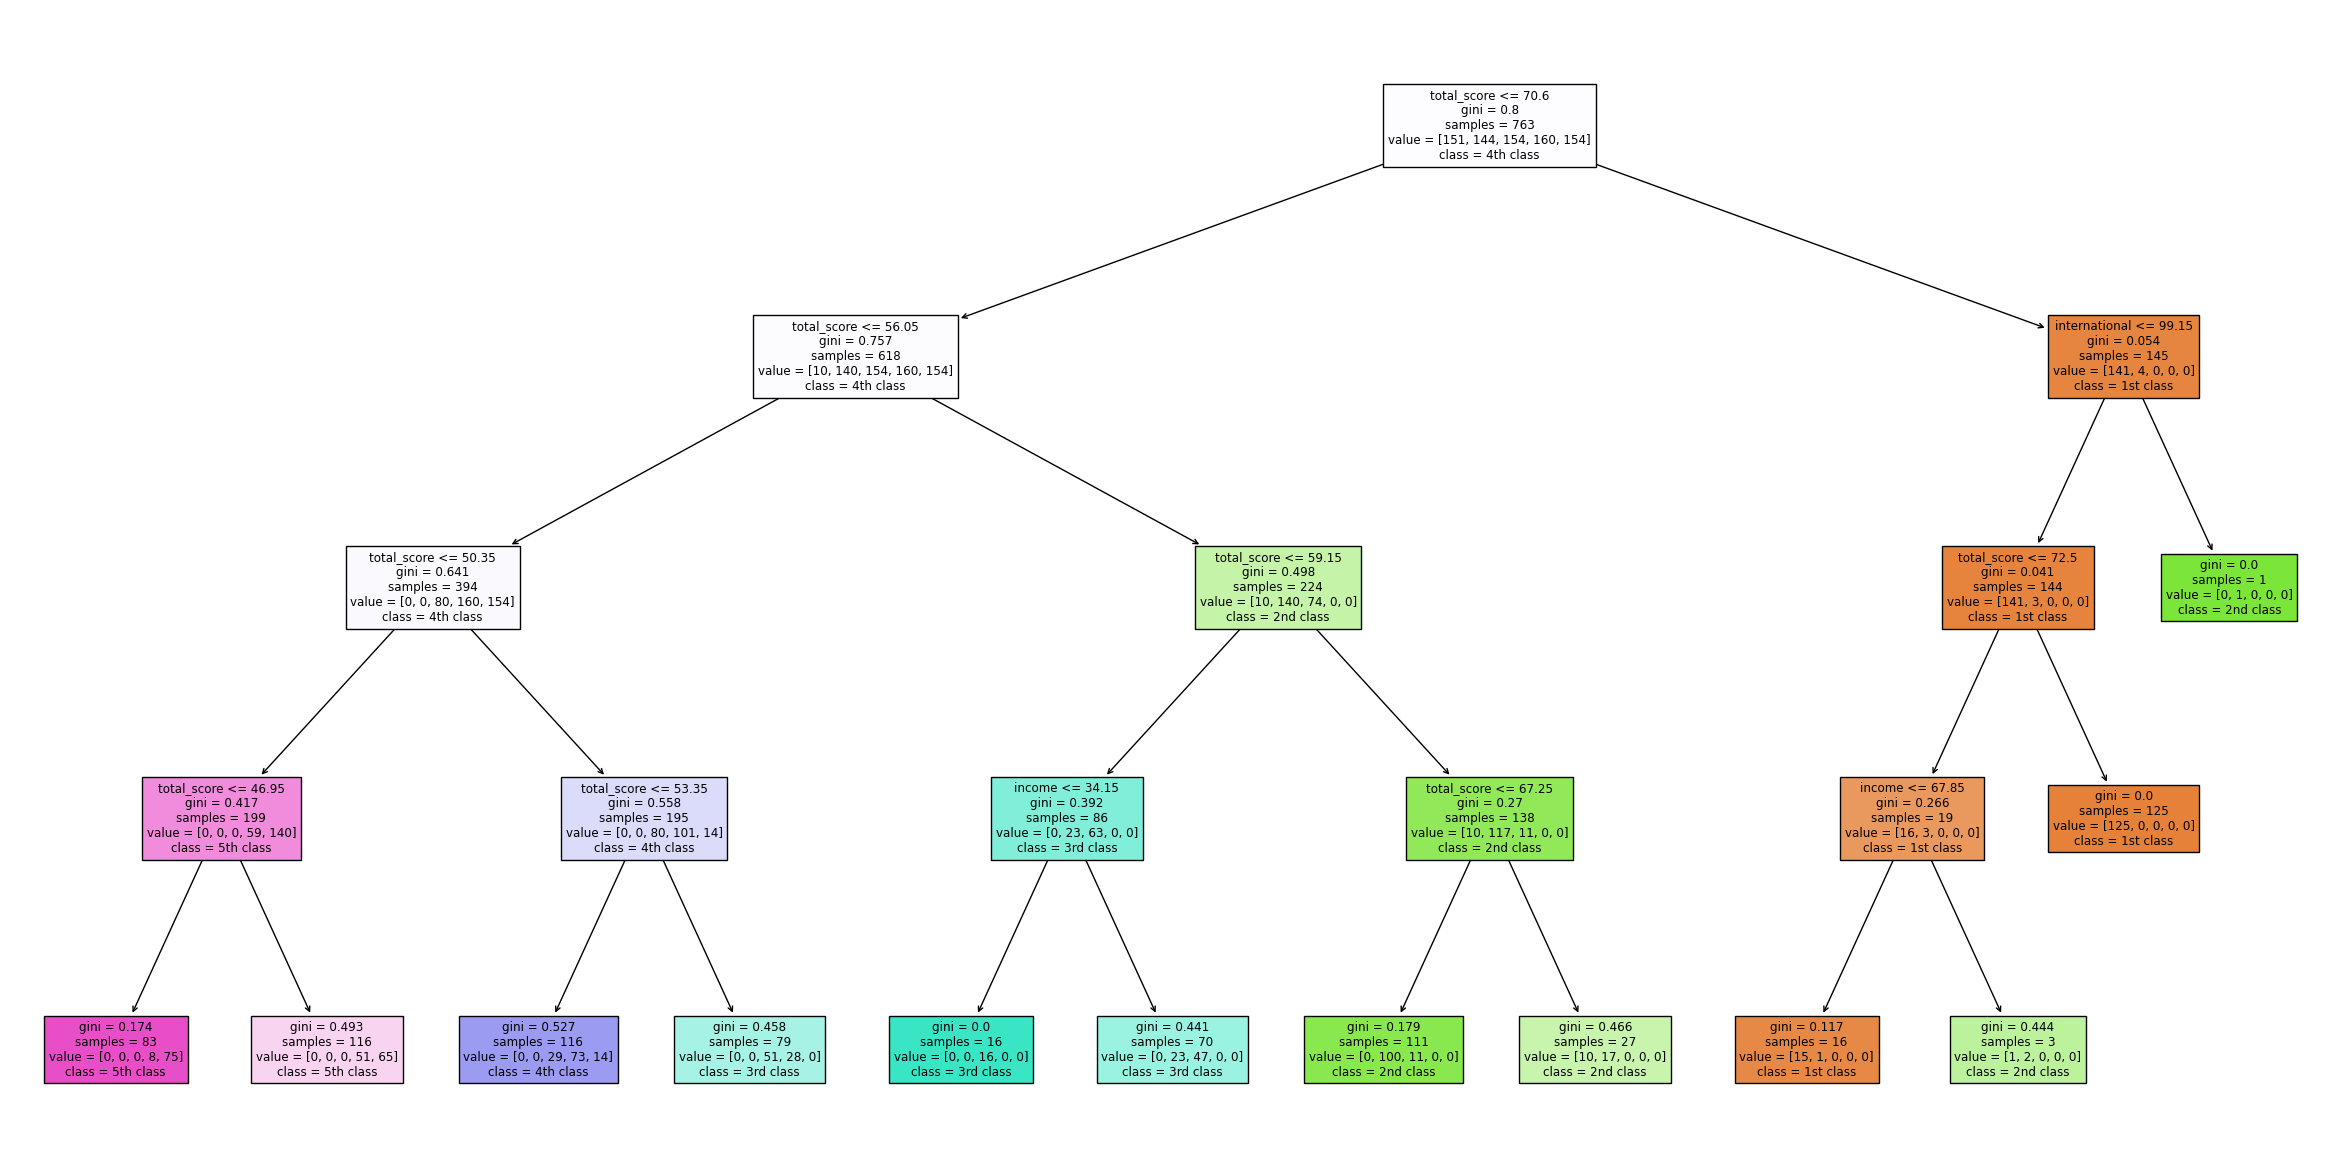

In [ ]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(30,15))
_ = tree.plot_tree(decision_tree,feature_names=X_names,class_names=Y_names,filled=True) # _ stops annotations print-out

At the top of each node is the decision rule used for the split using the gini impurity criterion. It is worthy of note that some nodes could not be splitted further before the depth is achieved. This is because the 'gini' value equals zero, the higher the gini value the greater the mixing between classes. If the tree is grown deeper than 4, some of these leaf nodes will be splitted further.

**Visualizing the tree perfomance on my dataset at different depths**

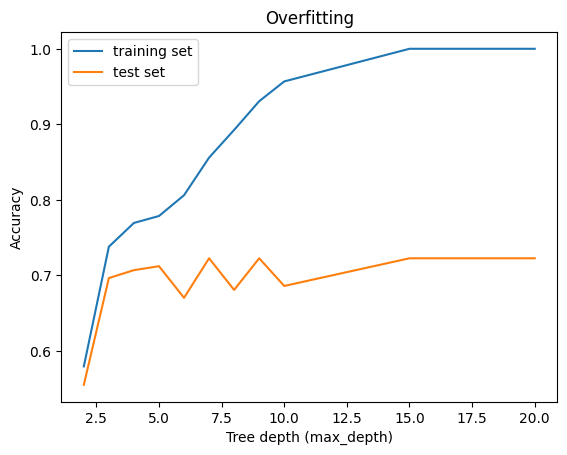

In [ ]:
# Plot accuracy as a function of max_depth
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
accuracytrain_list=[]
accuracytest_list=[]
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    decision_tree.fit(X_train,Y_train)
    # Training set
    ytrain_pred = decision_tree.predict(X_train)
    accuracy_train = metrics.accuracy_score(Y_train, ytrain_pred)
    accuracytrain_list.append(accuracy_train)
    # Test set
    ytest_pred = decision_tree.predict(X_test)
    accuracy_test = metrics.accuracy_score(Y_test, ytest_pred)
    accuracytest_list.append(accuracy_test)

# Plot accuracy as a function of max_depth
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()
line1, = ax.plot(max_depth_vals,accuracytrain_list,label='training set')
line2, = ax.plot(max_depth_vals,accuracytest_list,label='test set')
plt.legend(handles=[line1, line2])
plt.title("Overfitting")
plt.xlabel("Tree depth (max_depth)")
plt.ylabel("Accuracy")
plt.show()

This clearly shows that as the tree grows deeper, the model becomes overfitting to the training data and will not be good on the test data.

Cross Validation

In [ ]:
import math
# Use 5-fold cross-validation to compute the mean accuracy at a tree depth of 4
from sklearn.model_selection import cross_val_score
maxDepth = 4
k=5
decision_tree = tree.DecisionTreeClassifier(max_depth=maxDepth, random_state=2)
cv_scores = cross_val_score(decision_tree, X, Y, cv=k)
print('Cross-validation scores are:',cv_scores)

# Compute the average of the accuracies and its error
avg = sum(cv_scores)/len(cv_scores)
sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
print('Average performance for a tree depth of',maxDepth,'is:',np.round(avg*100,1),'+/-',np.round(sd*100,1),'%')

Cross-validation scores are: [0.70680628 0.56544503 0.67015707 0.65968586 0.57894737]
Average performance for a tree depth of 4 is: 63.6 +/- 6.1 %


I tried several tree depths (2,3,4,5) for the cross validation and depth of 4 performed averagely better than the rest.

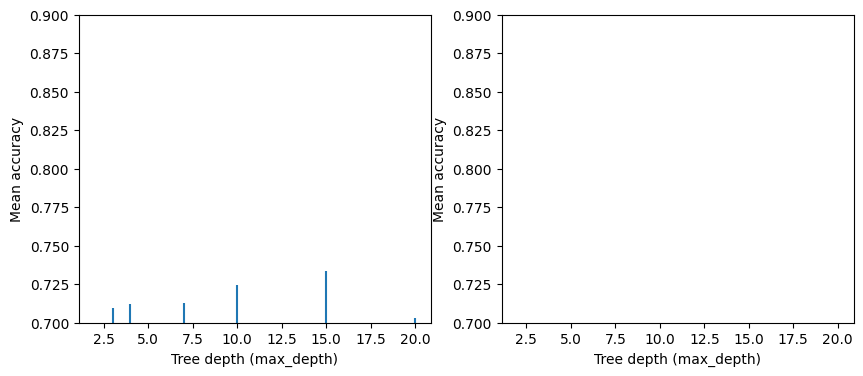

In [ ]:


# Plotting mean accuracy (found using the sklearn cross_val_score() class) as a function of max_depth.
from sklearn.model_selection import cross_val_score
import math

max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]

### 3-fold ###
k=3
mean_accuracy_cv_k3 = [] # mean accuracy over the k folds for each tree depth
sd_cv_k3 = [] # standard deviation of accuracy scores over the k folds for each tree depth

for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    cv_scores = cross_val_score(decision_tree, X, Y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv_k3.append(avg)
    sd_cv_k3.append(sd)

### 7-fold ###
k=7
mean_accuracy_cv_k7 = [] # mean accuracy over the k folds for each tree depth
sd_cv_k7 = [] # standard deviation of accuracy scores over the k folds for each tree depth

for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=i)
    cv_scores = cross_val_score(decision_tree, X, Y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
    mean_accuracy_cv_k7.append(avg)
    sd_cv_k7.append(sd)

# Make the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10, 4))

ax[0].errorbar(max_depth_vals,mean_accuracy_cv_k3,yerr=sd_cv_k3)
ax[0].set_xlabel("Tree depth (max_depth)")
ax[0].set_ylabel("Mean accuracy")
ax[0].set_ylim([0.70,0.9])

ax[1].errorbar(max_depth_vals,mean_accuracy_cv_k7,yerr=sd_cv_k7, color="orange")
ax[1].set_xlabel("Tree depth (max_depth)")
ax[1].set_ylabel("Mean accuracy")
ax[1].set_ylim([0.70,0.9])

plt.show()

After several folds of validations, I chose k values to be 3 and 7 which showed no error bar and average accuracy not up to 80%

**Feature importance**

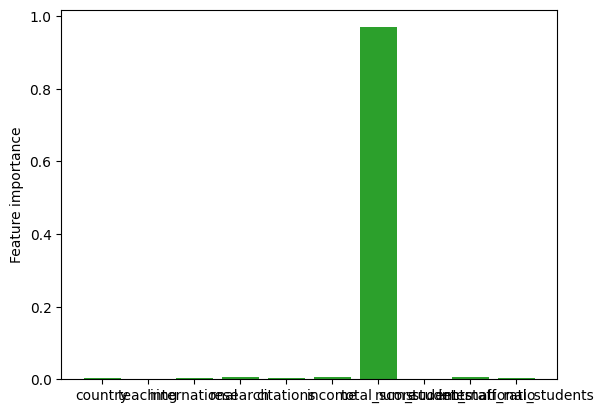

In [ ]:
# Plot a histogram of feature importances using a tree depth 4

def get_feature_importances(X,Y,randomState,maxDepth):
    from sklearn import tree, model_selection
    X_train, X_test, Y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.20,
                                                                        random_state=randomState, stratify=Y)
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state=randomState)
    decision_tree.fit(X_train,Y_train)
    return decision_tree.feature_importances_

maxDepth = 4

# Get feature importances for different train/test splits (by changing random_state in train_test_split()) and compute the average importance for each feature.
import random
random.seed(2)
feature_importances_summed = np.zeros(len(X_names))
n=100
for i in range(0,n):
    randomState = random.randint(0,1000)
    feature_importances = get_feature_importances(X,Y,randomState,maxDepth)
    # Commented out the below 2 lines and replaced with 1 (better to use less lines of code!)
    #tmp = zip(feature_importances_summed,feature_importances)
    #feature_importances_summed = [(x + y) for (x, y) in tmp]
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]

fig, ax = plt.subplots(1,1)
ax.bar(X_names, feature_importances_mean,color='tab:green')
ax.set_ylabel('Feature importance')
plt.show()

The feature ***Total  scores*** of the data sets appears to be the only important feature for the prediction of the world university ranks.

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=None,random_state=3,oob_score=True)
forest.fit(X_train,Y_train)
Y_train_pred = forest.predict(X_train)
print("Accuracy on training set:",round(metrics.accuracy_score(Y_train, Y_train_pred),2))
Y_test_pred = forest.predict(X_test)
print("Accuracy on test set:",round(metrics.accuracy_score(Y_test, Y_test_pred),2))
print("OOB score:",round(forest.oob_score_,2)) # Alternative to test set validation method

Accuracy on training set: 1.0
Accuracy on test set: 0.74
OOB score: 0.75


The accuracy score of the tree of depth 4 on the test data is 71% with average performance of 63.6. The random forest seem not to perform much better since the accuracy on test data is just 3% above that of a single tree.

The accuracy of 100% on the training data indicates that the model correctly predicted all the samples of the training data set. However, with a 74% accuracy on the test dataset, it implies that the model could only predict 74% of the unseen sample correctly. We also see that the model achieved an accuracy of 75% when predicting the out of bag sample hence OOB score = 0.75.

This difference between the training and test accuracies suggests that the model is not generalizing well to unseen data.

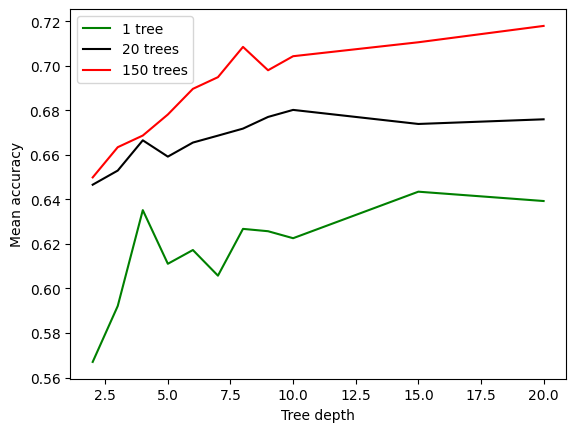

In [ ]:
# to find the mean accuracy of my model with several estimators

from sklearn.model_selection import cross_val_score
import math
from sklearn.ensemble import RandomForestClassifier
max_depth_vals = [2,3,4,5,6,7,8,9,10,15,20]
n_estimators_vals = [20,150]
mean_accuracy_store = []
sd_accuracy_store = []
k=5
for i, value in enumerate(n_estimators_vals):
    mean_accuracy_cv = []
    sd_cv = []
    for val in max_depth_vals:
        forest = RandomForestClassifier(n_estimators=value,bootstrap=True,max_features="sqrt",criterion='gini',max_depth=val,random_state=i,oob_score=False)
        cv_scores = cross_val_score(forest, X, Y, cv=k)
        avg = sum(cv_scores)/len(cv_scores)
        sd = math.sqrt(sum((cv_scores-avg)**2)/(len(cv_scores)-1))
        mean_accuracy_cv.append(avg)
        sd_cv.append(sd)
    mean_accuracy_store.append(mean_accuracy_cv)
    sd_accuracy_store.append(sd_cv)

fig = plt.figure()
ax = plt.axes()
line2, = ax.plot(max_depth_vals,mean_accuracy_store[0],color='black',label='20 trees')
line3, = ax.plot(max_depth_vals,mean_accuracy_store[1],color='red',label='150 trees')

# Now find accuracy scores as a function of tree depth for a single decision tree
mean_accuracy_cv = []
for i in range(0,len(max_depth_vals)):
    decision_tree = tree.DecisionTreeClassifier(max_depth=max_depth_vals[i], random_state=3)
    cv_scores = cross_val_score(decision_tree, X, Y, cv=k)
    avg = sum(cv_scores)/len(cv_scores)
    mean_accuracy_cv.append(avg)

line1, = ax.plot(max_depth_vals,mean_accuracy_cv,color='green',label='1 tree')


plt.legend(handles=[line1, line2, line3])
plt.xlabel("Tree depth")
plt.ylabel("Mean accuracy")
plt.show()


More trees perform better than lesser trees as seen in the plot above.

**Train with Unidetails and test with Stat_3yrs**

So I want to try training the model with the first data set of the university ranking 2011 - 2016 and then test with the second data set for the years 2021-2023

In [ ]:

# Now run the ML decision tree algorithm

# Begin by assigning training and test datasets so we can test our algorithm's performance


P_train=Unidetails.drop(['world_rank'],axis=1) # Input variables
P_names = Features[1:] # Remove 'world_names' from feature names
Q_train=Unidetails['world_rank'] # Target variable
Q_names=['1st class', '2nd class', '3rd class', '4th class', '5th class']
P_test = Stat_3yrs.drop(['world_rank'],axis=1) # Input variables
P_test_names = Features[1:] # Remove 'world_names' from feature names
Q_test = Stat_3yrs['world_rank'] # Target variable
Q_test_names=['1st class', '2nd class', '3rd class', '4th class']

from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 2, random_state=7) # Choose tree depth
decision_tree.fit(P_train,Q_train)
Q_pred=decision_tree.predict(P_test)

from sklearn import metrics
# Print the model accuracy
print("Accuracy on test set:",np.round(metrics.accuracy_score(Q_test, Q_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(P_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))
# items() method returns (key,value) tuple
print('Features in order of importance:')
for key in feature_importances_sorted:
    print(key)


Accuracy on test set: 0.66
Features in order of importance:
total_score
country
teaching
international
research
citations
income
num_students
student_staff_ratio
international_students


I tried tree depths of 4,3,2 and have depth of 2 with better accuracy score though 0.66 is low but it is better than depths of 3 and 4.



**RANDOM FOREST CLASSIFIER OF DIFFERENT DATASETS**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=450,bootstrap=True,criterion='entropy',max_depth=None,random_state=10,oob_score=True)
forest.fit(P_train,Q_train)
Q_train_pred = forest.predict(P_train)
print("Accuracy on training set:",round(metrics.accuracy_score(Q_train, Q_train_pred),2))
Q_test_pred = forest.predict(P_test)
print("Accuracy on test set:",round(metrics.accuracy_score(Q_test, Q_test_pred),2))
print("OOB score:",round(forest.oob_score_,2)) # Alternative to test set validation method

Accuracy on training set: 1.0
Accuracy on test set: 0.46
OOB score: 0.75


After several attemps with various estimators and criterion, the accuracies and OOB scores remained almost unchanged.

*** MERGING THE DATASETS**

At this time, I want to merge the two ranking data sets 2011-2016 and 2021-2023 and perform the split_train_test algorithm.

In [ ]:
# Now run the ML decision tree algorithm

from sklearn.model_selection import train_test_split
X_1=Unidetails.drop(['world_rank'],axis=1) # Input variables
A_names = Features[1:] # Remove 'world_names' from feature names
Y_1=Unidetails['world_rank'] # Target variable
B_names=['1st class', '2nd class', '3rd class', '4th class', '5th class']
X_2 = Stat_3yrs.drop(['world_rank'],axis=1) # Input variables
Y_2 = Stat_3yrs['world_rank'] # Target variable
A = pd.concat([X_1,X_2])
B = pd.concat([Y_1,Y_2])
A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.20, random_state=5, stratify=B)


from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 5, random_state=7) # Choose tree depth
decision_tree.fit(A_train,B_train)
B_pred=decision_tree.predict(A_test)

from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on test set:",np.round(metrics.accuracy_score(B_test, B_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(A_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))
# items() method returns (key,value) tuple
print('Features in order of importance:')
for key in feature_importances_sorted:
    print(key)

# Run the above code with different random_state seeds and max_depth values to see the effect on feature importance.

Accuracy on test set: 0.7
Features in order of importance:
total_score
country
student_staff_ratio
income
citations
international
num_students
research
teaching
international_students


Depth of 5 performed better in predicting the test data.

In [ ]:
#the random forest for the merged dataset
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=None,random_state=3,oob_score=True)
forest.fit(A_train,B_train)
B_train_pred = forest.predict(A_train)
print("Accuracy on training set:",round(metrics.accuracy_score(B_train, B_train_pred),2))
B_test_pred = forest.predict(A_test)
print("Accuracy on test set:",round(metrics.accuracy_score(B_test, B_test_pred),2))
print("OOB score:",round(forest.oob_score_,2)) # Alternative to test set validation method

Accuracy on training set: 1.0
Accuracy on test set: 0.8
OOB score: 0.78


I had a better test accuracy score of 0.8 on this merged dataset. This may probably be because the dataset increased in size. I also tried several number of estimators  but did not get a very significant change in test accuracy score. The size of the dataset contributes to the efficiency of a model.

***MISCELLENOUS***

From the feature importance plot above it is so clear that the total score is the most important feature. Can we try removing this aggregate feature to see the outcome?

In [ ]:
MIS_data = pd.concat([Unidetails,Stat_3yrs])


In [ ]:
MIS_data

,world_rank,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students
1,1,30,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,27
2,1,30,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,33
3,1,30,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,22
5,1,29,90.5,77.7,94.1,94.0,57,91.2,18812,11.8,34
6,1,29,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,34
...,...,...,...,...,...,...,...,...,...,...,...
145,4,8,44.5,64.4,46.5,80.0,77.3,58.0,33341,30.4,16
146,4,22,46.5,75.3,39.7,84.4,44.5,57.9,7068,9.2,28
147,4,22,45.6,45.6,46.3,85.5,44.6,57.8,34928,16.0,8
148,4,8,41.6,56.1,41.2,89.3,77.6,57.8,10271,26.2,13


In [ ]:
MIS_data = MIS_data.drop(('total_score'), axis = 1)

In [ ]:
import pandas as pd
# Go through each input feature checking if there are any (and how many) NaNs
Features2 = MIS_data.columns.tolist() # Make a list of the feature names
print(Features2)
for feature in Features2:
    num = 0
    for i in range(0,len(MIS_data)):
        if pd.isnull(MIS_data.iloc[i][feature]) == True:
            num = num + 1
    print('NaNs for', feature ,'is', num)

['world_rank', 'country', 'teaching', 'international', 'research', 'citations', 'income', 'num_students', 'student_staff_ratio', 'international_students']
NaNs for world_rank is 0
NaNs for country is 0
NaNs for teaching is 0
NaNs for international is 0
NaNs for research is 0
NaNs for citations is 0
NaNs for income is 0
NaNs for num_students is 0
NaNs for student_staff_ratio is 0
NaNs for international_students is 0


In [ ]:
# Now run the ML decision tree algorithm

# Begin by separating into training and test datasets so we can test our algorithm's performance
from sklearn.model_selection import train_test_split

X_M=MIS_data.drop(['world_rank'],axis=1) # Input variables
X_M_names = Features2[1:] # Remove 'world_rank' from feature names
Y_M=MIS_data['world_rank'] # Target variable
Y_M_names=['1st class', '2nd class', '3rd class', '4th class', '5th class']
X_M_train, X_M_test, Y_M_train, Y_M_test = train_test_split(X_M, Y_M, test_size=0.20, random_state=3, stratify=Y_M)


from sklearn import tree
decision_tree = tree.DecisionTreeClassifier(max_depth = 4, random_state=6) # Choose tree depth
decision_tree.fit(X_M_train,Y_M_train)
Y_M_pred=decision_tree.predict(X_M_test)

from sklearn import metrics
# Print the model accuracy (how often is the classifier correct?)
print("Accuracy on test set:",np.round(metrics.accuracy_score(Y_M_test, Y_M_pred),2))

# Print out the feature importances
feature_importances_dict = {}
for i, name in enumerate(X_M_names): feature_importances_dict.update({name : decision_tree.feature_importances_[i]})

# Sort features in descending order of importance (need to use reverse=True for descending)
feature_importances_sorted = dict(sorted(feature_importances_dict.items(), key=lambda x:x[1], reverse=True))
# items() method returns (key,value) tuple
print('Features in order of importance:')
for key in feature_importances_sorted:
    print(key)

Accuracy on test set: 0.62
Features in order of importance:
research
citations
teaching
income
country
international
num_students
student_staff_ratio
international_students


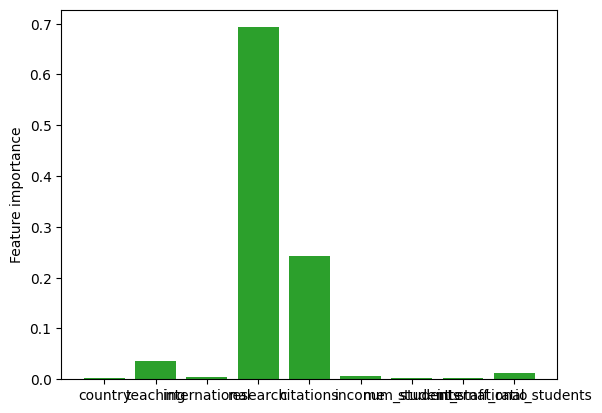

In [ ]:
# Plot a histogram of feature importances using a tree depth 4

def get_feature_importances(X,Y,randomState,maxDepth):
    from sklearn import tree, model_selection
    X_M_train, X_M_test, Y_M_train, Y_M_test = model_selection.train_test_split(X_M, Y_M, test_size=0.20,
                                                                        random_state=randomState, stratify=Y_M)
    decision_tree = tree.DecisionTreeClassifier(max_depth = maxDepth, random_state=randomState)
    decision_tree.fit(X_M_train,Y_M_train)
    return decision_tree.feature_importances_

maxDepth = 4

# Get feature importances for different train/test splits (by changing random_state in train_test_split()) and compute the average importance for each feature.
import random
random.seed(2)
feature_importances_summed = np.zeros(len(X_M_names))
n=100
for i in range(0,n):
    randomState = random.randint(0,1000)
    feature_importances = get_feature_importances(X,Y,randomState,maxDepth)
    # Commented out the below 2 lines and replaced with 1 (better to use less lines of code!)
    #tmp = zip(feature_importances_summed,feature_importances)
    #feature_importances_summed = [(x + y) for (x, y) in tmp]
    feature_importances_summed = feature_importances_summed + feature_importances
feature_importances_mean = [number / n for number in feature_importances_summed]

fig, ax = plt.subplots(1,1)
ax.bar(X_M_names, feature_importances_mean,color='tab:green')
ax.set_ylabel('Feature importance')
plt.show()

This is the expected change in the feature importance bar plot. After the removal of the total score feature.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=100,bootstrap=True,criterion='gini',max_depth=None,random_state=3,oob_score=True)
forest.fit(X_M_train,Y_M_train)
Y_M_train_pred = forest.predict(X_M_train)
print("Accuracy on training set:",round(metrics.accuracy_score(Y_M_train, Y_M_train_pred),2))
Y_M_test_pred = forest.predict(X_M_test)
print("Accuracy on test set:",round(metrics.accuracy_score(Y_M_test, Y_M_test_pred),2))
print("OOB score:",round(forest.oob_score_,2)) # Alternative to test set validation method

Accuracy on training set: 1.0
Accuracy on test set: 0.77
OOB score: 0.74


**CONCLUSION**

We have come to the end of our analysis using the world ranking datasets of 2011-2016 and 2021-2023. I reduced the dataset to consider the top 200 universities which gave me a medium sized dataset. However from the performance scores of the decision trees and random forest algrothms on the test data, it is clear that for these algorithms to better predict the test data, they should be trained with large volume of labelled data. I also found out that the training data should be very balanced covering all posible instances like in the case of training with ***Unidetails*** and testing with ***Stat_3yrs*** the model performed poorly.